In [27]:
import tensorflow
tensorflow.__version__

'2.10.0'

# 딥러닝 기본

## 패션 MNIST

* 머신러닝의 기본 데이터셋은 붓꽃 데이터셋, 보스톤집값
* 딥러닝의 기본 데이터셋은 MNIST 데이터셋이 유명합니다. 

## 데이터 로드

In [29]:
from tensorflow import keras

#이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [11]:
#훈련 데이터 크기 확인
#훈련 데이터는 6만개의 이미지로 이루어짐
#각 이미지는 28 * 28크기
X_train.shape, y_train.shape
#타깃도 6만개의 원소가 있는 1차원 배열

# 아래의 결과를 보면 그림으로 형태가 떠올라야한다!


((60000, 28, 28), (60000,))

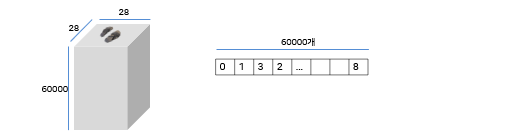

In [10]:
type(X_train), type(y_train) #(참고) X_train[0] 이런 방식으로 추출 가능

(numpy.ndarray, numpy.ndarray)

In [12]:
# 1만개의 이미지로 이루어짐
X_test.shape, y_test.shape # 6만장은 학습용 데이터 셋, 1만장은 테스트용으로 분류된 상태

((10000, 28, 28), (10000,))

In [13]:
X_train[0] # 첫번째 이미지 추출

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
X_train.dtype

dtype('uint8')

In [15]:
X_train[0].shape #2D 텐서

(28, 28)

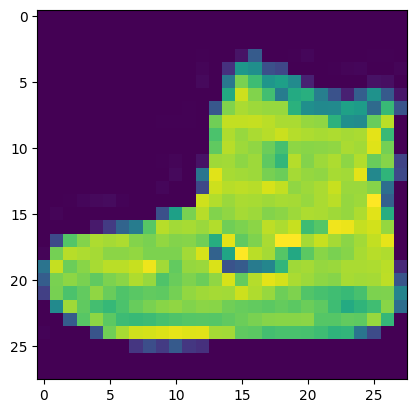

In [30]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0]) # impshow의 cmap 디폴트가 viridis임.
# 0에 가까울수록 보라, 255에 가까울수록 연두색

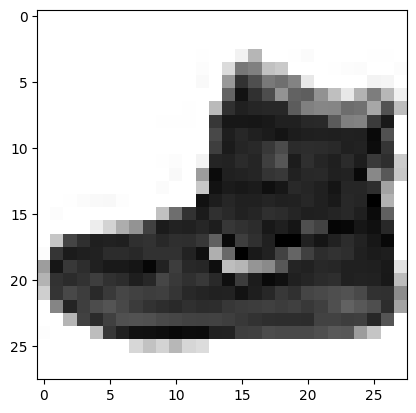

In [17]:
plt.imshow(X_train[0], cmap=plt.cm.binary) 

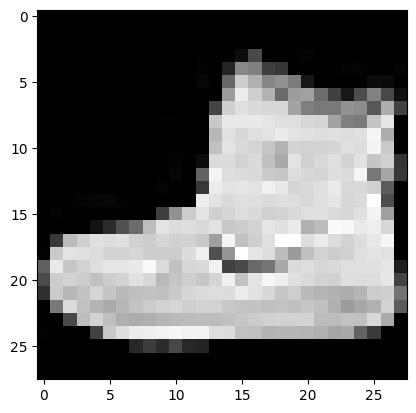

In [18]:
plt.imshow(X_train[0], cmap='gray') 

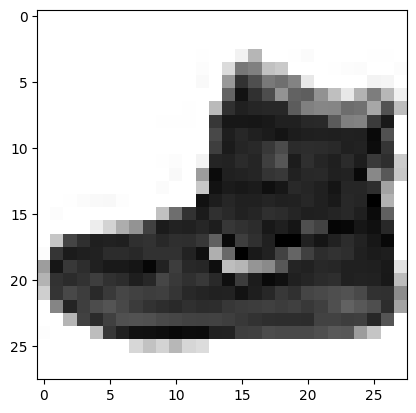

In [19]:
plt.imshow(X_train[0], cmap='gray_r') # r= 리버스.
plt.show() 

In [ ]:
# 이미지를 출력할 때, 시각화에 보이는 색상과 데이터숫자값과 일치하지 않을 수 있다.

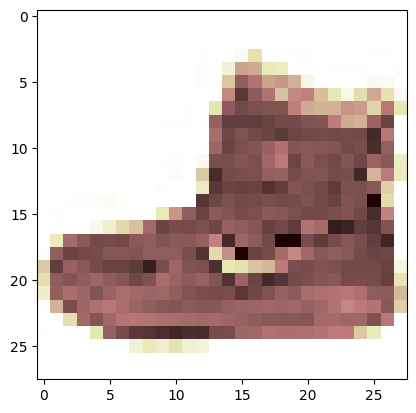

In [20]:
plt.imshow(X_train[0], cmap='pink_r')
plt.show() 

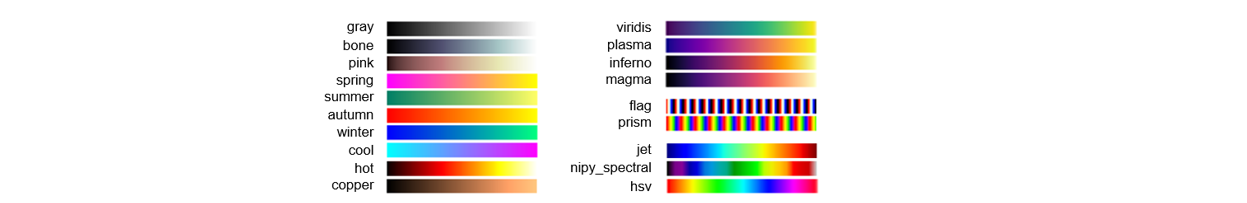

In [ ]:
plt.imshow(X_train[i],cmap='gray')

In [ ]:
plt.imshow(X_train[i],cmap='gray_r')

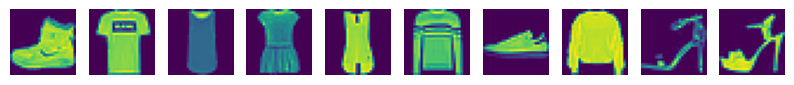

In [4]:
#이미지 출력

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i])
    axs[i].axis('off')
plt.show()

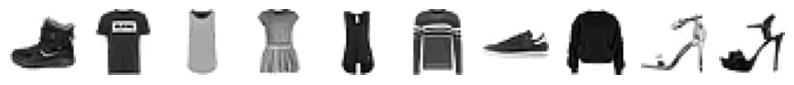

In [31]:
#이미지 출력

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap='gray_r') #0~255값으로 이루어진 데이터, 출력을 했을 때 흑색이 눈에 보이려면 반전
    axs[i].axis('off')
plt.show()

In [23]:
#10개의 샘플에 대한 타깃값
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


[레이블 값]
* 0:티셔츠
* 1:바지
* 2:스웨터
* 3:드레스
* 4:코트
* 5:샌달
* 6:셔츠
* 7:스티커즈
* 8:가방
* 9:앵클부츠

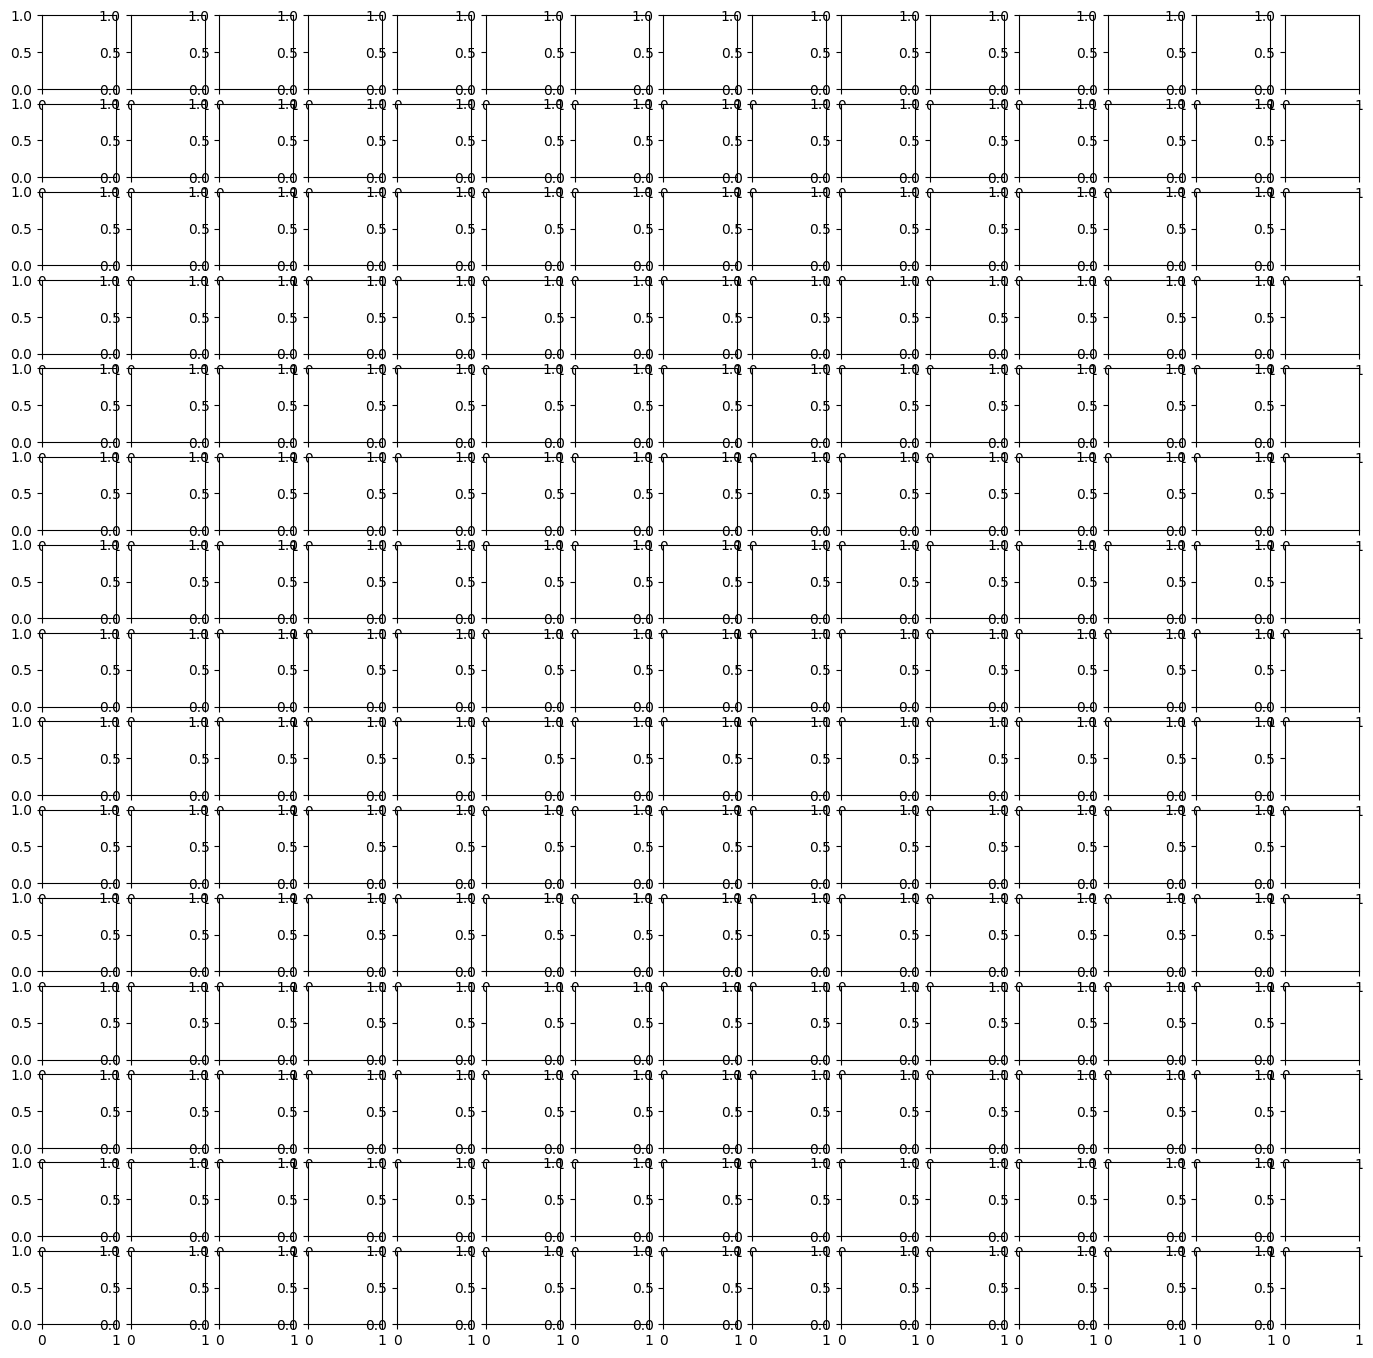

In [25]:
L_grid=15
W_grid=15
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))
plt.show()

# 맵구성 하나하나에 이미지 파일이 배치됨

In [27]:
axes.shape, type(axes) 
# 즉 축은 15x15사이즈에, (0,0) (0,1) (0,2)... 인덱싱이 되어 있다는 뜻

((15, 15), numpy.ndarray)

In [28]:
axes = axes.ravel() #2D축을 벡터로 차원 변환

In [29]:
axes.shape # 2D -> 1D 벡토로 차원 변환된 것을 확인
# 가로한줄 225칸(15x15=225)
# 2차원이면 for문을 2번 돌려야하니 불편해서 1차원으로 변경해준 것이다

(225,)

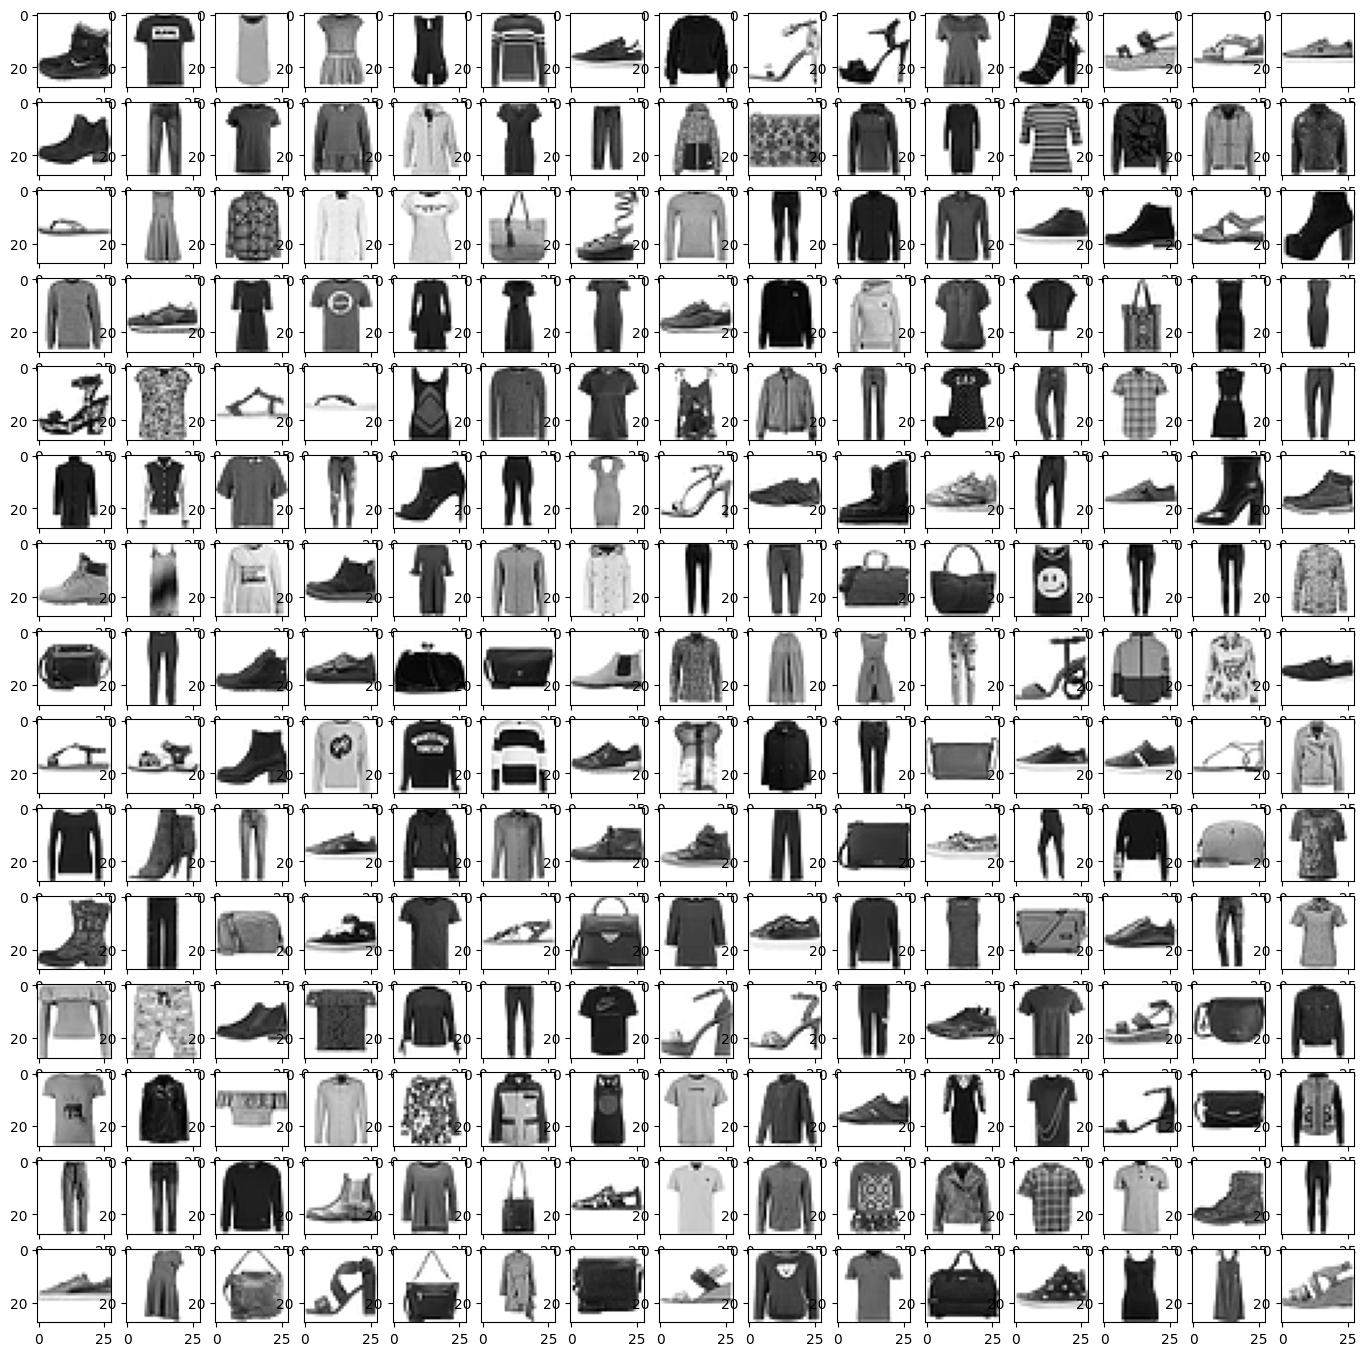

In [5]:
L_grid=15
W_grid=15
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

axes = axes.ravel() #2D축을 벡터로 차원 변환해서 일렬로 만듬 

for i in range(225):
    axes[i].imshow(X_train[i], cmap='gray_r')

plt.show()

# 225개의 이미지를 한꺼번에 출력

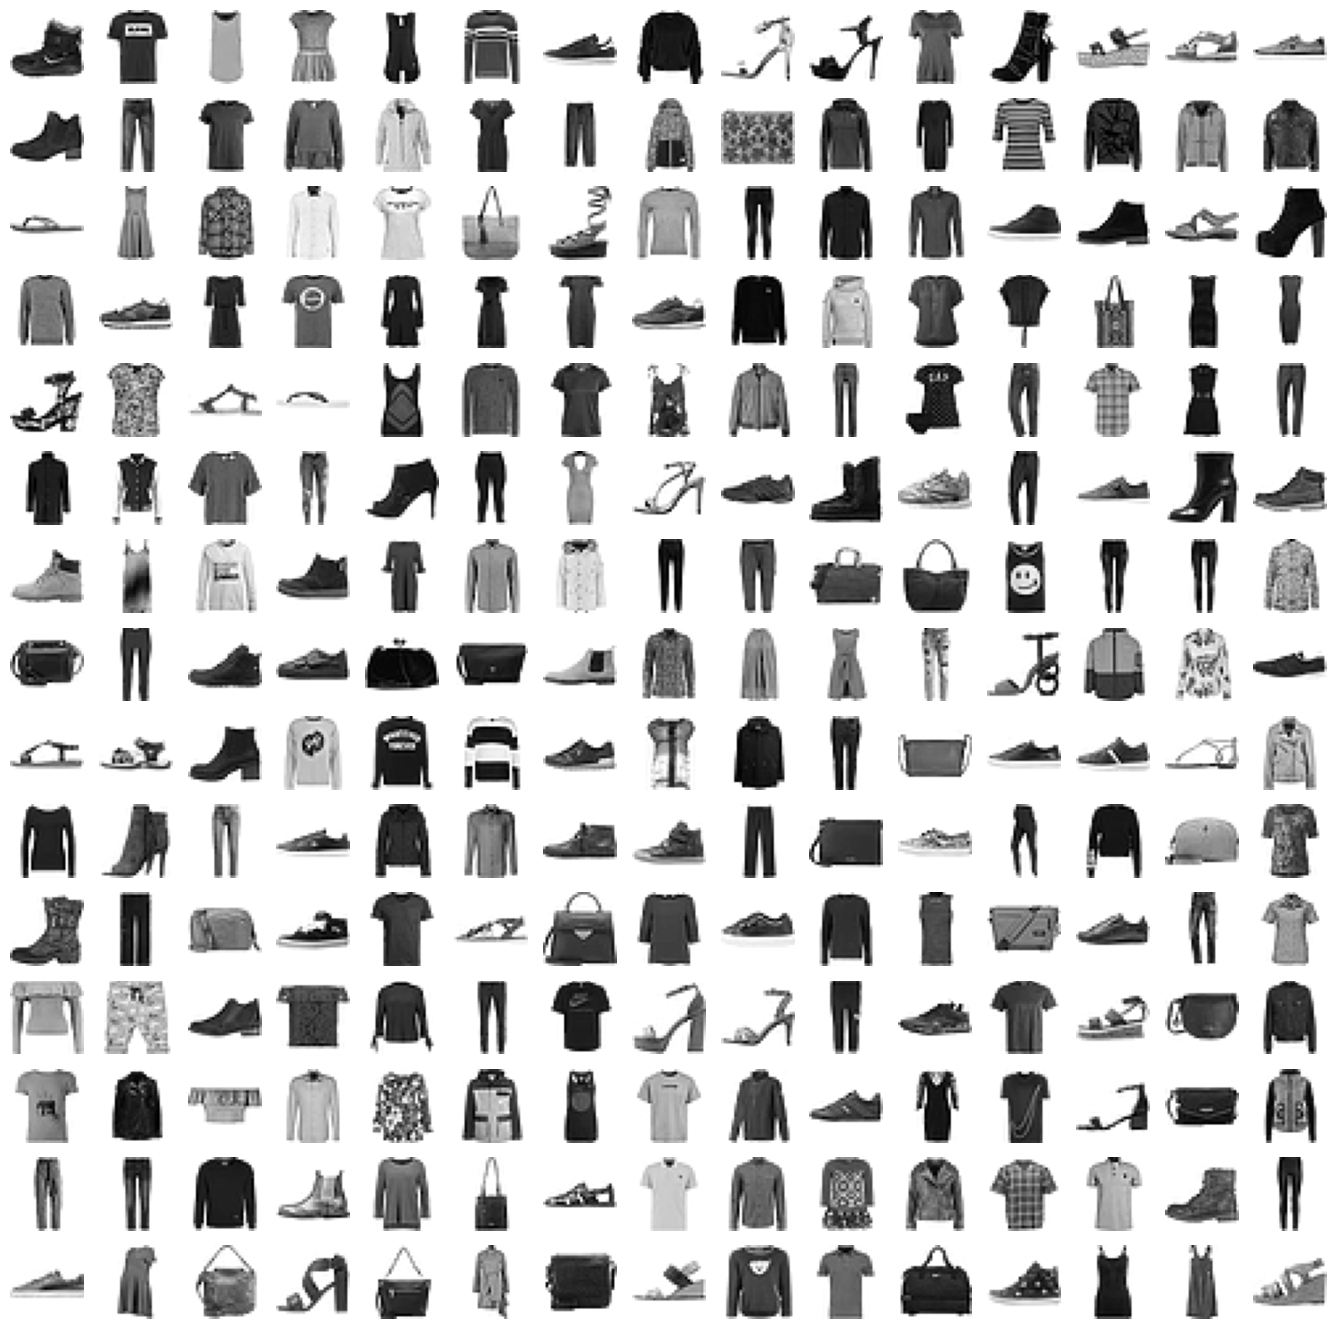

In [32]:
L_grid=15
W_grid=15
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

axes = axes.ravel() #2D축을 벡터로 차원 변환해서 일렬로 만듬 

for i in range(225):
    axes[i].imshow(X_train[i], cmap='gray_r')
    axes[i].axis('off') # 축을사용하지않음 -> 표기 지움
plt.show()

# 이미지 데이터로 작업한다면
# 대략적인 이미지를 시각화로 보여줌

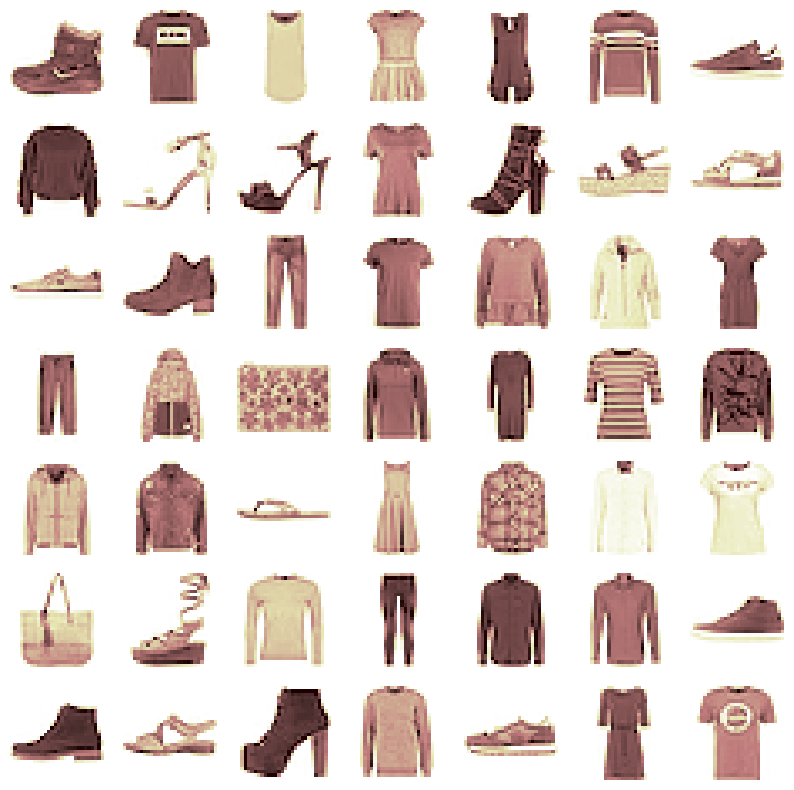

In [34]:
L_grid=7
W_grid=7
fig, axes = plt.subplots(L_grid,W_grid,figsize=(10,10))

axes = axes.ravel() #2D축을 벡터로 차원 변환해서 일렬로 만듬 

for i in range(49):
    axes[i].imshow(X_train[i], cmap='pink_r')
    axes[i].axis('off') # 축을사용하지않음 -> 표기 지움
plt.show()

In [33]:
import numpy as np
#샘플당 개수
#데이터프레임의 value_counts()와 같음
#이미지 데이터여서 넘파이를 사용함
# = 클래스 종류가 몇개가 있고, 그 클래스의 데이터 수가 몇개인지

np.unique(y_train, return_counts=True) # 균형잡힌 데이터구나~

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [ ]:
# 0~9까지의 클래스에, 각각 6000개씩 데이터가 존재.
# => 클래스가 매우 균형적이다 
# 각 클래스에 대해 균형적인 훈련이 이루어지겠군~

> 레이블 당 샘플개수가 각각 6000개씩 있어 균형잡힌 데이터입니다. 

## 데이터 전처리

In [6]:
X_train.shape

(60000, 28, 28)

In [34]:
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침
# 28*28=784 => 1차원으로 변경

In [35]:
print(train_scaled.shape) # 샘플수는 같은데. 한장에 대한 값은 픽셀값으로 벡터화

(60000, 784)


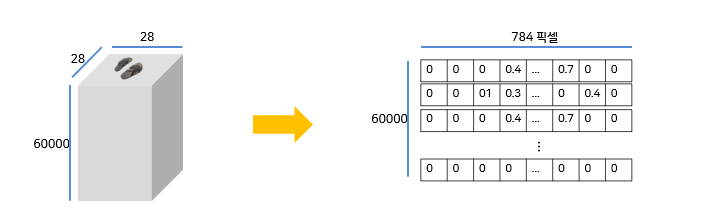

In [ ]:
# 입력층에 노드들이 있고 여기에 픽셀값이 들어갈것
# 이러한 네트워크의 특성을 고려해 1차원으로 변경해주는 것

## 인공신경망(ANN)

* 선형방정식이 아닌 인공신경망으로 성능을 높여봅시다. 
* 클래스가 총 10개이므로 $z_{10}$까지 계산합니다. 
* $z_{1}$ ~ $z_{10}$을 계산하고 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미로 **출력층**이라고 부릅니다. 
* $z$값을 계산하는 단위를 **뉴런 또는 유닛**이라고 부릅니다.
* $x_{1}$ ~   $x_{784}$까지를 **입력측**이라고 합니다. 

* 즉, 입력층은 픽셀값 자체입니다. 

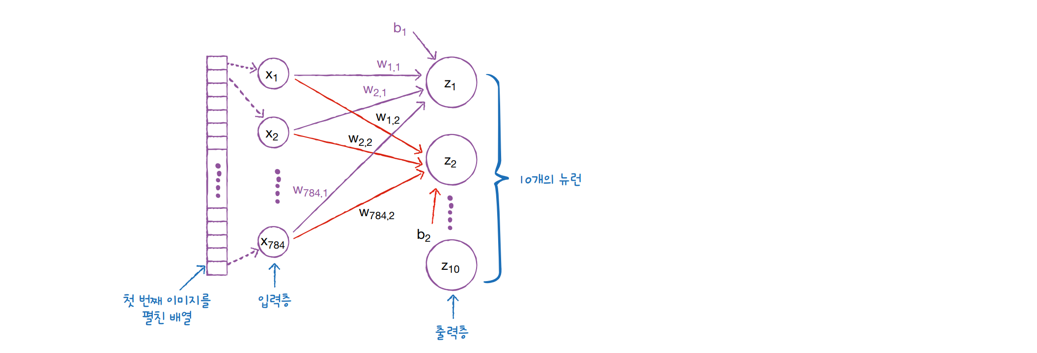

In [ ]:
# 어제는 이진분류. 
# 현재는 다중분류. 그래서 출력층이 10개!

## 라이브러리 로드

In [36]:
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 신경망 구성하기

* 인공신경망에서는 교차검증을 수행하지 않음
* 딥러닝 분야는 일단 데이터양이 충분하기 때문이고,
* 교차검증은 수행시간이 길다는 특성 때문입니다. 
* 딥러닝은 안 그래도 수행시간이 긴데 말이죠~~

* 훈련데이터와 검증용 데이터를 분리해서 사용함

In [37]:
from sklearn.model_selection import train_test_split

#20% 검증데이터로 지정
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

In [38]:
#훈련용 데이터 
print(train_scaled.shape, y_train.shape)

(48000, 784) (48000,)


In [39]:
#검증용 데이터
print(val_scaled.shape, y_val.shape)

(12000, 784) (12000,)


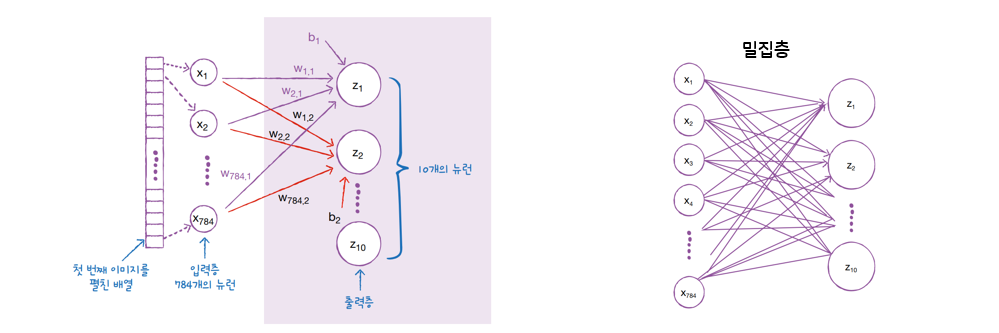

* 10개의 패션 아이템으로 분류하기 위해 10개의 뉴런으로 구성
* 784개의 픽셀과 오른쪽의 10개의 뉴런이 모두 연결되면 오른쪽 그림처럼 784x10 = 7840개의 연결된 선이 생기고
* 따라서 이를 빽빽해서 **밀집층**이라고 합니다.  
* 이런 층을 양쪽의 뉴런이 모두 연결하고 있기 때문에 **완전 연결층(fully connected layer)** 라고 부릅니다. 

```python
Dense(뉴런개수, activation=뉴런출력에 적용할 함수, input_shape=입력의 크기)
```

In [ ]:
신경망모델사진 찍어서 ppt에 넣자. 

In [40]:
#신경망 모델 만들기
model = Sequential()

In [41]:
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 뉴런개수 : 10 => 10개의 패션 아이템 분류
# 활성화 함수: 뉴런에서 출력되는 값을 확률로 바꾸기위해 소프트 맥스 함수 사용(다중분류이기때문)
# 입력값크기 : 784개의 픽셀값

# 층하나에 입력정보와 출력정보를 모두 담아야함

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 784*10 + 10 = 7850 파라미터

In [ ]:
#뉴런개수:10 -> 10개의 패션아이템 분류
#활성화함수: 뉴런에서 출력되는 값을 확률로 바꾸기 위해 소프트맥스 함수 사용(다중분류이기 때문)
#입력값크기: 784개의 픽셀값

In [ ]:
# 이진분류 -> 출력에 시그모이드
# 다중분류 -> 출력에 소프트맥스

* 뉴런의 선형방정식 계산 결과에 적용되는 함수를 **활성화 함수**라고 부릅니다. 
* 인공신경망에 소프트맥수 이외에 다양한 활성화 함수가 존재합니다. 

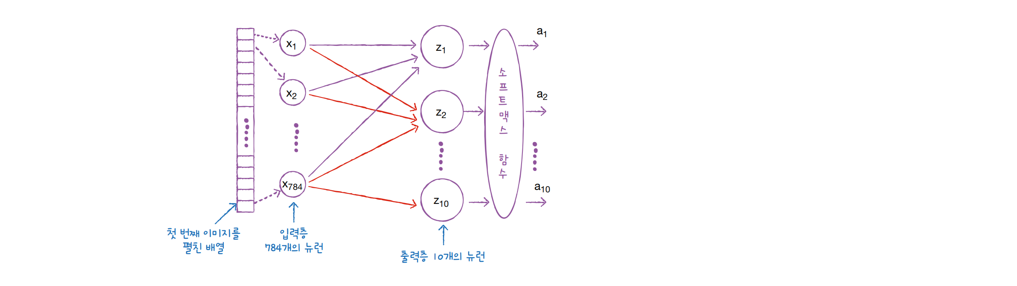

## 신경망 설정하기

* 손실함수 
    * 이진 분류: binary_crossentropy
    * 다중 분류: categorical_crossentropy (타깃값을 0,1로 이루어진 원-핫 인코딩으로 준비했다면)
    * 다중 분류: sparse_categorical_crossentropy(타깃값이 정수로 이루어 졌을 때)

* metrics:
    * 분류: accuracy
    * 회귀: mse

In [43]:
 #타깃값이 정수로 이루어져 있음
y_train[:10] # 타깃에 정수라벨링이 되어있음
#  이대로 학습한다면 sparse_categorical~ 사용
#  원핫인코딩으로 0,1되어있으면 categorical~ 사용

array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss 어떻게 오차를 측정할거니
# opt 어떻게 오차를 줄여갈거니, 경사하강법
# metrics 평가검증을 어떻게 할거니

## 신경망 훈련하기

In [47]:
 #전체 데이터 5번 반복훈련
epoch_hist = model.fit(train_scaled, y_train, epochs=5, batch_size=10)

Epoch 1/5
4800/4800 [==============================] - 4s 786us/step - loss: 0.5633 - accuracy: 0.8084
Epoch 2/5
4800/4800 [==============================] - 4s 781us/step - loss: 0.4530 - accuracy: 0.8446
Epoch 3/5
4800/4800 [==============================] - 4s 757us/step - loss: 0.4349 - accuracy: 0.8494
Epoch 4/5
4800/4800 [==============================] - 4s 757us/step - loss: 0.4199 - accuracy: 0.8548
Epoch 5/5
4800/4800 [==============================] - 4s 753us/step - loss: 0.4129 - accuracy: 0.8553


In [ ]:
# 에포크 늘리면서, 정확도 늘려가기
# 배치사이즈 올릴수록 훈련 속도가 어떻게 변하는지

## 신경망 평가하기

In [48]:
#검증세트로 평가하기
model.evaluate(val_scaled, y_val) # 실제값, 예측값 

375/375 [==============================] - 0s 722us/step - loss: 0.4284 - accuracy: 0.8515


[0.428398996591568, 0.8514999747276306]

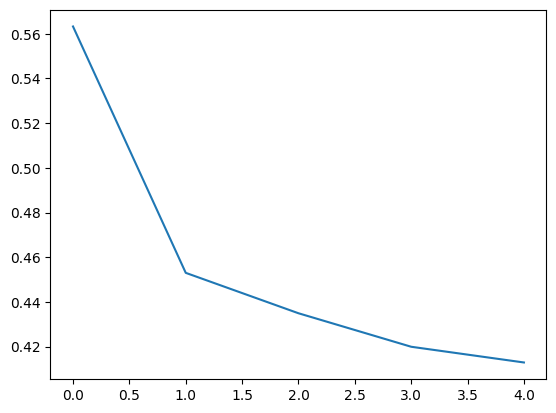

In [49]:
plt.plot(epoch_hist.history['loss'])

In [ ]:
# 내려갈수없을만크 내려가야하는데 아직 학습을 더해도 될 여지가 있어보인다

> 훈련세트에서의 점수보다 조금 낮다. <br> 

---

## 전체 코드 : 데이터 전처리, 정규화, shape변경 포함

In [ ]:
# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 특정 이미지 시각화 출력
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray_r')

# 일부 이미지 시각화 출력
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap='gray_r') #0~255값으로 이루어진 데이터, 출력을 했을 때 흑색이 눈에 보이려면 반전
    axs[i].axis('off')
plt.show()

# 전체 이미지 시각화 출력
L_grid=15
W_grid=15
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

axes = axes.ravel() #2D축을 벡터로 차원 변환해서 일렬로 만듬 

for i in range(225):
    axes[i].imshow(X_train[i], cmap='gray_r')
    axes[i].axis('off') # 축을사용하지않음 -> 표기 지움
plt.show()

#샘플당 개수 확인 : 클래스 종류가 몇개가 있고, 그 클래스의 데이터 수가 몇개인지
import numpy as np #이미지 데이터여서 넘파이를 사용함
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=5, batch_size=10)

# 신경망 평가하기
model.evaluate(val_scaled, y_val) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

Epoch 1/5
4800/4800 [==============================] - 4s 792us/step - loss: 0.5640 - accuracy: 0.8054
Epoch 2/5
4800/4800 [==============================] - 4s 841us/step - loss: 0.4549 - accuracy: 0.8441
Epoch 3/5
4800/4800 [==============================] - 4s 817us/step - loss: 0.4324 - accuracy: 0.8507
Epoch 4/5
4800/4800 [==============================] - 4s 796us/step - loss: 0.4221 - accuracy: 0.8536
Epoch 5/5
375/375 [==============================] - 0s 667us/step - loss: 0.4199 - accuracy: 0.8538
[0.41992008686065674, 0.8538333177566528]


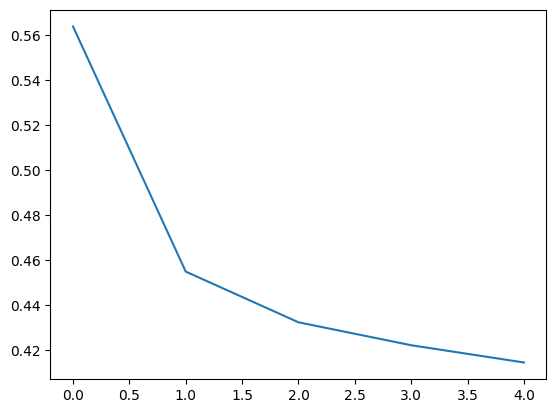

In [51]:
# 종합코드 생략버전

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=5, batch_size=10)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val)) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

---

Epoch 1/10
4800/4800 [==============================] - 4s 782us/step - loss: 0.5616 - accuracy: 0.8063
Epoch 2/10
4800/4800 [==============================] - 4s 747us/step - loss: 0.4533 - accuracy: 0.8431
Epoch 3/10
4800/4800 [==============================] - 4s 759us/step - loss: 0.4329 - accuracy: 0.8504
Epoch 4/10
4800/4800 [==============================] - 4s 759us/step - loss: 0.4218 - accuracy: 0.8515
Epoch 5/10
4800/4800 [==============================] - 4s 754us/step - loss: 0.4135 - accuracy: 0.8557
Epoch 6/10
4800/4800 [==============================] - 4s 758us/step - loss: 0.4082 - accuracy: 0.8594
Epoch 7/10
4800/4800 [==============================] - 4s 767us/step - loss: 0.4014 - accuracy: 0.8598
Epoch 8/10
4800/4800 [==============================] - 4s 749us/step - loss: 0.3984 - accuracy: 0.8601
Epoch 9/10
4800/4800 [==============================] - 4s 788us/step - loss: 0.3955 - accuracy: 0.8619
Epoch 10/10
375/375 [==============================] - 0s 619us/

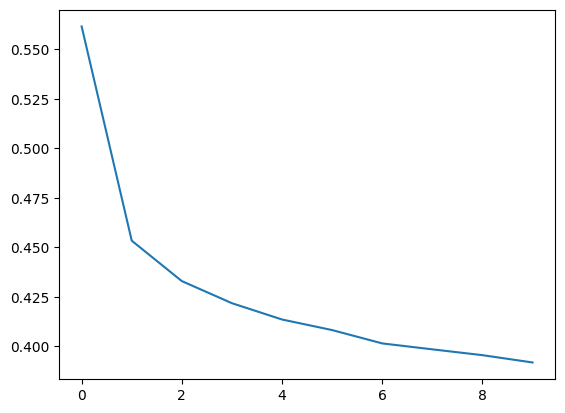

In [52]:
# 변경1 : epochs만 2배인 10으로 증가 -> 시간소요 증대, 로스 및 정확도 역효과

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=10, batch_size=10)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val))  # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

Epoch 1/5
1600/1600 [==============================] - 1s 785us/step - loss: 0.6128 - accuracy: 0.7946
Epoch 2/5
1600/1600 [==============================] - 2s 993us/step - loss: 0.4714 - accuracy: 0.8394
Epoch 3/5
1600/1600 [==============================] - 1s 777us/step - loss: 0.4416 - accuracy: 0.8491
Epoch 4/5
1600/1600 [==============================] - 1s 775us/step - loss: 0.4274 - accuracy: 0.8538
Epoch 5/5
375/375 [==============================] - 0s 636us/step - loss: 0.4309 - accuracy: 0.8494
[0.4309408664703369, 0.8494166731834412]


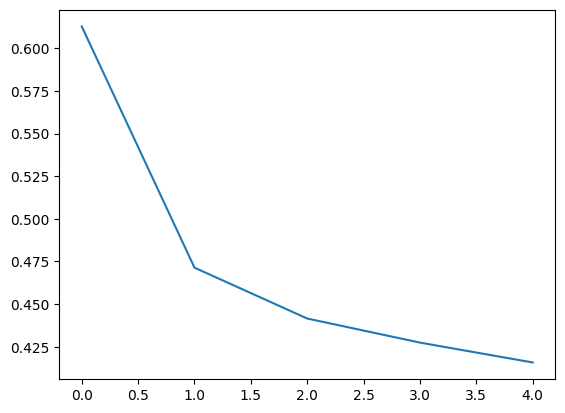

In [53]:
# 변경2 : batchsize 증가 -> 시간 빨라짐

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=5, batch_size=30)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val)) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

Epoch 1/100
96/96 [==============================] - 0s 2ms/step - loss: 1.1114 - accuracy: 0.6464
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.7787
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.8053
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.8164
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.8261
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.8316
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.8366
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.8405
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.8428
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8458
Epoch 11/

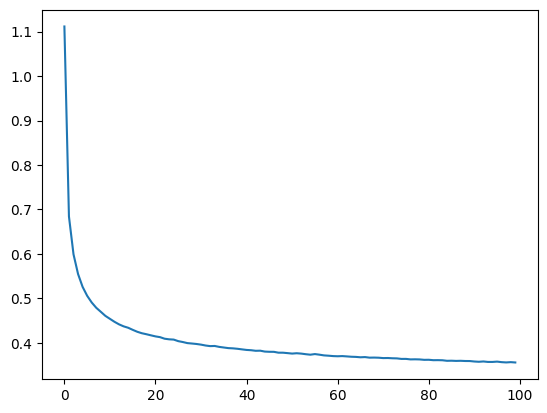

In [54]:
# 변경3 : 배치사이즈 500으로 증가, 에포크 100으로 증가 -> 학습이 더 잘되고 있다

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=100, batch_size=500)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val)) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

Epoch 1/200
96/96 [==============================] - 0s 2ms/step - loss: 1.0683 - accuracy: 0.6547
Epoch 2/200
96/96 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.7818
Epoch 3/200
96/96 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.8062
Epoch 4/200
96/96 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.8204
Epoch 5/200
96/96 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8272
Epoch 6/200
96/96 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.8335
Epoch 7/200
96/96 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.8386
Epoch 8/200
96/96 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8423
Epoch 9/200
96/96 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.8441
Epoch 10/200
96/96 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8474
Epoch 11/

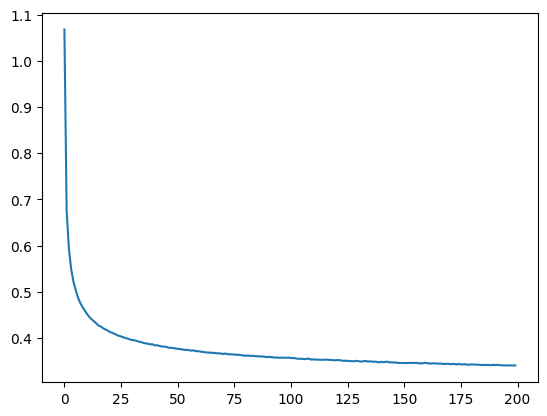

In [55]:
# 변경4 : 배치사이즈 500으로 증가, 에포크 200으로 증가

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=200, batch_size=500)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val)) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

Epoch 1/200
480/480 [==============================] - 1s 983us/step - loss: 8.3409 - accuracy: 0.7567
Epoch 2/200
480/480 [==============================] - 0s 933us/step - loss: 7.4590 - accuracy: 0.7925
Epoch 3/200
480/480 [==============================] - 0s 935us/step - loss: 8.1091 - accuracy: 0.7966
Epoch 4/200
480/480 [==============================] - 0s 964us/step - loss: 8.2972 - accuracy: 0.8011
Epoch 5/200
480/480 [==============================] - 0s 971us/step - loss: 8.3613 - accuracy: 0.8075
Epoch 6/200
480/480 [==============================] - 0s 947us/step - loss: 7.9036 - accuracy: 0.8094
Epoch 7/200
480/480 [==============================] - 0s 942us/step - loss: 9.1317 - accuracy: 0.8080
Epoch 8/200
480/480 [==============================] - 0s 952us/step - loss: 8.2407 - accuracy: 0.8123
Epoch 9/200
480/480 [==============================] - 0s 979us/step - loss: 8.6731 - accuracy: 0.8114
Epoch 10/200
480/480 [==============================] - 0s 958us/step - l

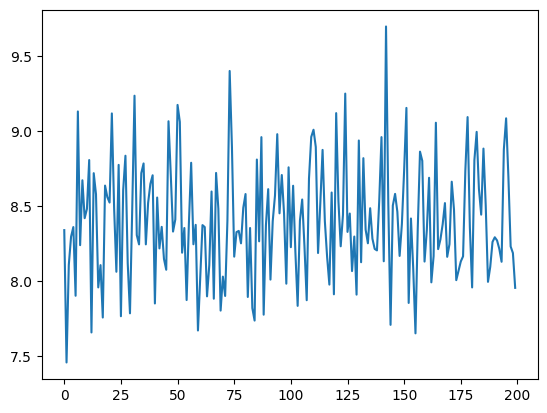

In [57]:
# 변경5  : 에포크 200 아담변경 배치사이즈 100

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.5), metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=200, batch_size=100)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val)) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

Epoch 1/25
960/960 [==============================] - 1s 862us/step - loss: 0.6566 - accuracy: 0.7829
Epoch 2/25
960/960 [==============================] - 1s 854us/step - loss: 0.4868 - accuracy: 0.8345
Epoch 3/25
960/960 [==============================] - 1s 835us/step - loss: 0.4523 - accuracy: 0.8469
Epoch 4/25
960/960 [==============================] - 1s 846us/step - loss: 0.4355 - accuracy: 0.8515
Epoch 5/25
960/960 [==============================] - 1s 845us/step - loss: 0.4238 - accuracy: 0.8549
Epoch 6/25
960/960 [==============================] - 1s 845us/step - loss: 0.4141 - accuracy: 0.8585
Epoch 7/25
960/960 [==============================] - 1s 831us/step - loss: 0.4082 - accuracy: 0.8587
Epoch 8/25
960/960 [==============================] - 1s 831us/step - loss: 0.4034 - accuracy: 0.8609
Epoch 9/25
960/960 [==============================] - 1s 826us/step - loss: 0.3991 - accuracy: 0.8617
Epoch 10/25
960/960 [==============================] - 1s 854us/step - loss: 0.394

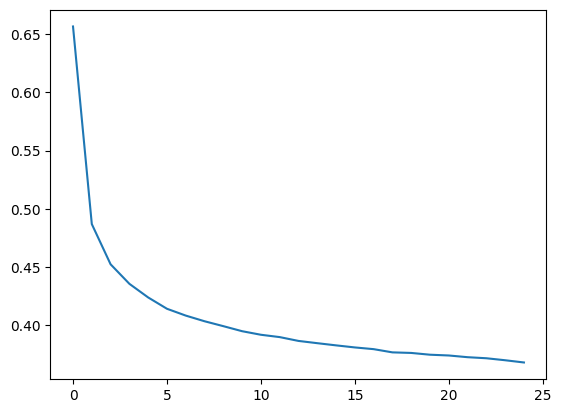

In [58]:
# 에포크  25 배치사이즈 50

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=25, batch_size=50)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val)) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

Epoch 1/50
960/960 [==============================] - 1s 859us/step - loss: 0.6601 - accuracy: 0.7796
Epoch 2/50
960/960 [==============================] - 1s 821us/step - loss: 0.4866 - accuracy: 0.8352
Epoch 3/50
960/960 [==============================] - 1s 831us/step - loss: 0.4522 - accuracy: 0.8467
Epoch 4/50
960/960 [==============================] - 1s 849us/step - loss: 0.4346 - accuracy: 0.8510
Epoch 5/50
960/960 [==============================] - 1s 878us/step - loss: 0.4238 - accuracy: 0.8552
Epoch 6/50
960/960 [==============================] - 1s 833us/step - loss: 0.4156 - accuracy: 0.8577
Epoch 7/50
960/960 [==============================] - 1s 819us/step - loss: 0.4100 - accuracy: 0.8589
Epoch 8/50
960/960 [==============================] - 1s 891us/step - loss: 0.4030 - accuracy: 0.8602
Epoch 9/50
960/960 [==============================] - 1s 865us/step - loss: 0.3984 - accuracy: 0.8616
Epoch 10/50
960/960 [==============================] - 1s 812us/step - loss: 0.395

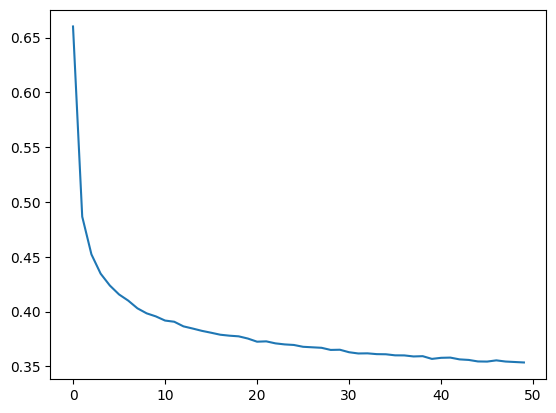

In [59]:
# 에포크  25 배치사이즈 50

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=50, batch_size=50)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val)) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

In [ ]:
# 종합코드 생략버전

# 라이브러리 로드
import tensorflow as tf
from tensorflow import keras

#데이터 로드 : 이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#샘플당 개수 확인 : 클래스 종류, 그 클래스의 데이터 수가 몇 개인지 균형을 확인
import numpy as np 
np.unique(y_train, return_counts=True) #데이터프레임의 value_counts()와 같음

# 데이터 전처리 : 정규화, shape 변경
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

# 신경망 구성
#데이터셋 분리 : 20% 검증데이터로 지정
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

#신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# 신경망 설정하기
# y_train[:10] # 타깃의 라벨링이 어떤 방식인지 확인
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 신경망 훈련하기
epoch_hist = model.fit(train_scaled, y_train, epochs=5, batch_size=10)

# 신경망 평가하기
print(model.evaluate(val_scaled, y_val)) # 실제값, 예측값 

# 시각화
plt.plot(epoch_hist.history['loss'])

In [ ]:
# 85이상으로 안올라가는 것을 보니 네트워크 자체를 바꾸어야겠다.